# Get the dataset

In [1]:
names = open("names.txt").read().splitlines(); names[:5]

['emma', 'olivia', 'ava', 'isabella', 'sophia']

# Create bigrams

In [2]:
from itertools import chain


delimited_names = [list(chain(['.'], list(name), ['.'])) for name in names]
delimited_names[:2]

[['.', 'e', 'm', 'm', 'a', '.'], ['.', 'o', 'l', 'i', 'v', 'i', 'a', '.']]

In [3]:
bigrams = [list(zip(dn, dn[1:])) for dn in delimited_names]
bigrams[:2]

[[('.', 'e'), ('e', 'm'), ('m', 'm'), ('m', 'a'), ('a', '.')],
 [('.', 'o'),
  ('o', 'l'),
  ('l', 'i'),
  ('i', 'v'),
  ('v', 'i'),
  ('i', 'a'),
  ('a', '.')]]

# Visualize bigrams

In [4]:
import matplotlib.pyplot as plt

In [5]:
import numpy as np

In [6]:
chars = ['.'] + sorted(set(''.join(names)))
chars

['.',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z']

In [7]:
ctoi = {c: i for i, c in enumerate(chars)}
ctoi

{'.': 0,
 'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26}

In [8]:
N = len(chars)
N

27

In [9]:
bigram_table = np.zeros((N, N), dtype=np.uint)

In [10]:
for name in bigrams:
    for c1, c2 in name:
        i1, i2 = ctoi[c1], ctoi[c2]
        bigram_table[i1, i2] += 1

In [11]:
itoc = {i: c for c, i in ctoi.items()}
itoc

{0: '.',
 1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z'}

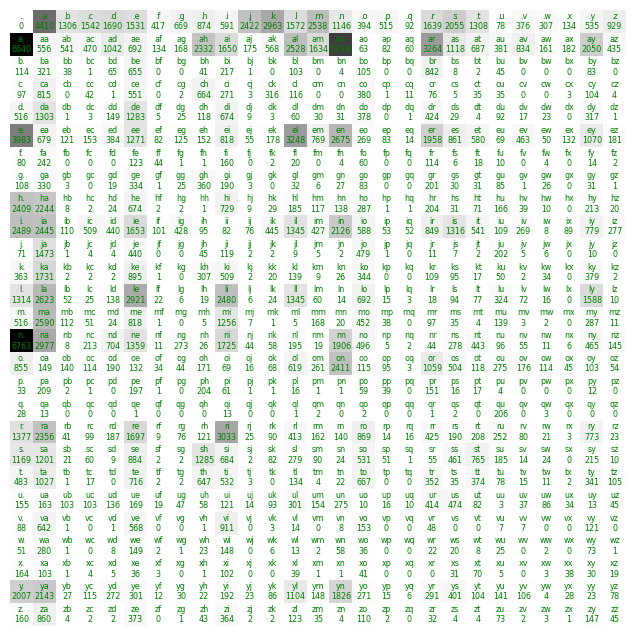

In [12]:
def vis_bigram_table(table, percent: bool):
    plt.figure(figsize=(8,8))
    plt.imshow(table, cmap="Grays")

    ax = plt.gca()  # Get the current axes
    for spine in ax.spines.values():
        spine.set_visible(False)

    ax.set_xticks([])  # Hide x ticks
    ax.set_yticks([])  # Hide y ticks

    for (i1, i2), _ in np.ndenumerate(table):
        c1, c2 = itoc[i1], itoc[i2]
        count = table[i1, i2]
        c = c1 + c2
        plt.text(i2, i1, f'{c}\n{count*100:.0f}%' if percent else f'{c}\n{count}', ha='center', va='center', size='xx-small', color='green')

vis_bigram_table(bigram_table, percent=False)

# Probabilities table

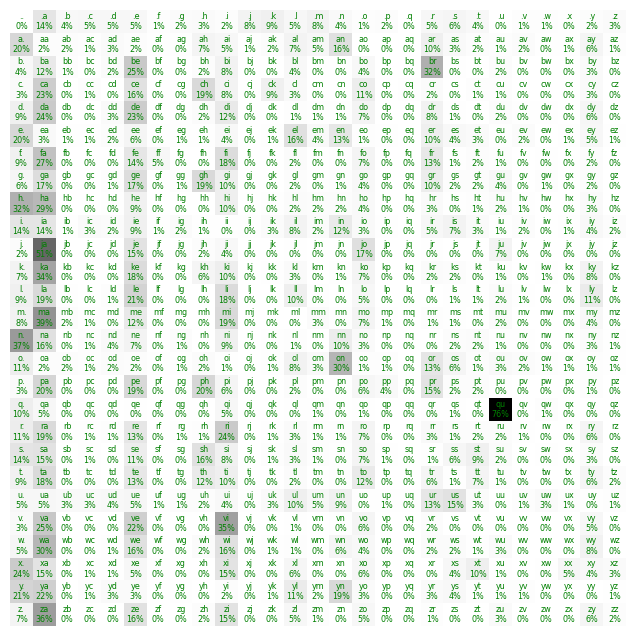

In [13]:
P = bigram_table / bigram_table.sum(1, keepdims=True)
vis_bigram_table(P, percent=True)

In [14]:
assert P[0].sum() == 1

# Char generation

In [15]:
first_char = '.'

In [16]:
first_char_i = ctoi[first_char]
assert first_char_i == 0

In [17]:
P[first_char_i]

array([0.        , 0.13767053, 0.04077046, 0.04813786, 0.05275809,
       0.04779446, 0.01301783, 0.02088471, 0.02728436, 0.01844972,
       0.07560953, 0.09249836, 0.04907439, 0.07923079, 0.03577561,
       0.01229982, 0.01607717, 0.00287204, 0.05116599, 0.06415259,
       0.04083289, 0.00243499, 0.0117379 , 0.00958387, 0.00418319,
       0.01670153, 0.02900134])

In [18]:
np.random.seed(1)
second_char_i = np.random.choice(len(P[first_char_i]), 1, replace=True, p=P[first_char_i]).item()
second_char_i, itoc[second_char_i]

(10, 'j')

In [19]:
np.random.seed(1)
third_char_i = np.random.choice(len(P[second_char_i]), 1, replace=True, p=P[second_char_i]).item()
third_char_i, itoc[third_char_i]

(1, 'a')

# Name generation

In [20]:
np.random.seed(3)

for _ in range(10):
    char_i = 0
    gen_name = ''
    while True:
        next_char_i = np.random.choice(len(P[char_i]), 1, p=P[char_i]).item()
        next_char = itoc[next_char_i]
        
        if next_char == '.': break

        gen_name += next_char
        char_i = next_char_i
    print(gen_name)

kichotaa
jaliane
kaibre
kleaixzitte
meiaiiaelun
deaal
kaninien
kal
dyaneone
aa


# Loss estimation

In [21]:
joined = '.'.join(names)
joined[:100]

'emma.olivia.ava.isabella.sophia.charlotte.mia.amelia.harper.evelyn.abigail.emily.elizabeth.mila.ella'

In [22]:
x = list(joined)
y = list(joined[1:])
dataset = list(zip(x, y))
dataset[:10]

[('e', 'm'),
 ('m', 'm'),
 ('m', 'a'),
 ('a', '.'),
 ('.', 'o'),
 ('o', 'l'),
 ('l', 'i'),
 ('i', 'v'),
 ('v', 'i'),
 ('i', 'a')]

In [23]:
nlls = []

for x, y in dataset[:10]:
    ix, iy = ctoi[x], ctoi[y]
    p = P[ix, iy]
    nll = -np.log(p)
    if p == 0.0: print(p, nll)
    nlls.append(nll)

f'mean loss is {np.mean(nlls)}'

'mean loss is 2.540944471279976'

# NN

In [24]:
import torch


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.1 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/Users/moe/Development/bigrams/.venv/lib/python3.10/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/Users/moe/Development/bigrams/.venv/lib/python3.10/site-packages/trait

In [25]:
W = torch.randn(N, N)
W.shape

torch.Size([27, 27])

In [26]:
import torch.nn.functional as F

In [27]:
W.requires_grad_();

In [28]:
x, y = zip(*dataset)
xt = F.one_hot(torch.tensor(list(map(lambda a: ctoi[a], x)))).float()
yt = torch.tensor(list(map(lambda a: ctoi[a], y)))
xt.shape, yt.shape

(torch.Size([228144, 27]), torch.Size([228144]))

In [33]:
bs = 32
epochs = 10

for _ in range(epochs):
    losses = []

    for i in range(0, len(xt), bs):
        xb, yb = xt[i:min(i+bs, len(xt))], yt[i:min(i+bs, len(yt))]
        xb.shape, yb.shape

        # Forward pass
        logits = xb @ W
        counts = logits.exp()
        p = counts / counts.sum(1, keepdim=True)

        # Loss calculation
        loss = -p[torch.arange(len(yb)), yb].log().mean()
        losses.append(loss.item())

        # Optimize
        loss.backward()
        W.data -= 0.1 * W.grad
        W.grad.zero_()

    print(f"loss is {np.mean(losses)}")

loss is 2.449410991330969
loss is 2.448765533033962
loss is 2.4482059084349226
loss is 2.44771613024729
loss is 2.447283987560914
loss is 2.446899865352422
loss is 2.4465562499756563
loss is 2.446247157492109
loss is 2.4459676783014648
loss is 2.445713889297897
